## Linear Regression with Gradient Descent from scratch
 one variable linear regression

 Multiple variable linear regression
 
 Gradient Descent - squared mean cost function


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [3]:
def prediction(Xtrain,coeff):
    Ypred=[]
    cols=Xtrain.columns
    for i in range(Xtrain.shape[0]):
        y=coeff[0]
        x=Xtrain.loc[i]
        for j in range (1,len(coeff)):
            y+=coeff[j]*(x[cols[j-1]])
        Ypred.append(y)
    return Ypred

def Coefficients(Ytrain,Xtrain,coeff,alpha=0.000001):
    # using gradiant decent with squared mean cost function
    Ypred = prediction(Xtrain,coeff)
    pd=[0]*len(coeff)
    cols=Xtrain.columns
    for i in range (len (Ypred)):
        x=Xtrain.loc[i]
        pd[0]+=(Ypred[i]-Ytrain[i])
        for j in range (1,len(coeff)):
                pd[j]+=(Ypred[i]-Ytrain[i])*x[cols[j-1]]
                
    for i in range(len(coeff)):
        pd[i]=(pd[i]*2)/len(Ypred)
        coeff[i]=coeff[i]-(alpha*(pd[i]))
    return coeff

def LinRegression(Xtrain,Ytrain,Xtest,Ytest,inbuilt=0,coeff=[1],alpha=0.00000005):
    if(inbuilt):
        linreg=LinearRegression()
        linreg.fit(Xtrain,Ytrain)
        predictions=linreg.predict(Xtest)
        coefficients=[linreg.intercept_]
        coefficients.extend(linreg.coef_)
        return coefficients,predictions,linreg.score(Xtest,Ytest)
    else:
        cost=[]
        if(len(coeff)==1):
            coeff=[1]*(len(Xtrain.columns)+1)
        rounds=100
        for i in range(rounds):
            coeff=Coefficients(Ytrain,Xtrain,coeff,alpha)
            cost.append(cost_function(Xtrain,Ytrain,coeff))
        Ypred=prediction(Xtest,coeff)
        return coeff,Ypred,cost

In [4]:
def cost_function(x,y,coeff): 
    sum=0;
    for i in range(0,len(x)):
        k=coeff[0]
        for j in range(1,len(coeff)):
            k+=(coeff[j]*x.iloc[i,j-1])
        k-=y.loc[i]
        k=np.square(k)
        sum+=k
    return (sum/len(x))

In [5]:
df=pd.read_csv('gold-silver.csv')
df.reset_index(drop=True,inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,gold,silver
0,0,535,1980-01-18,469.20,1854.23
1,1,536,1980-01-21,478.56,1901.93
2,2,537,1980-01-22,450.93,1856.74
3,3,7780,2007-10-26,451.42,550.24
4,4,7781,2007-10-29,454.49,556.20


<AxesSubplot:xlabel='gold', ylabel='silver'>

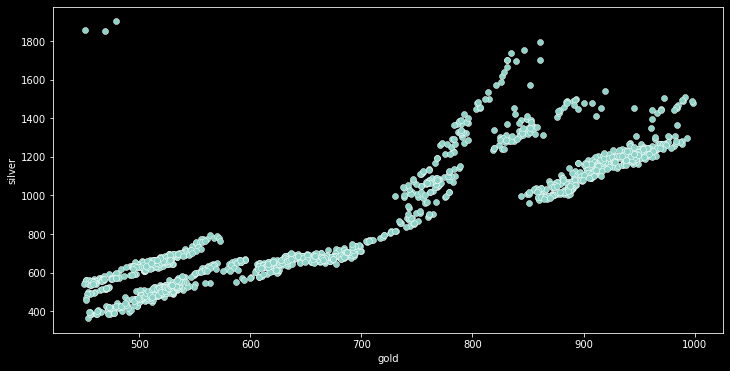

In [6]:
sns.scatterplot(data=df,x='gold',y='silver')

In [7]:
X=df[['gold']]
Y=df['silver']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=101);
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

### scratch

In [8]:
Ypred=LinRegression(x_train, y_train, x_test, y_test, inbuilt=0,coeff=[10,2])
print("coefficients of Scratch LinearReg model: \n",Ypred[0],"\n")
print("predictions of Scratch LinearReg model: \n",Ypred[1][:20],"\n")
# print("accuracy of this model is : ")

coefficients of Scratch LinearReg model: 
 [9.998818122886552, 1.250303507828659] 

predictions of Scratch LinearReg model: 
 [938.4116878610572, 1105.2521879457138, 804.7167337689388, 677.8234307594082, 584.0006555319455, 587.6515417748053, 1126.3072990175483, 1227.981980274175, 1083.8094827864522, 1171.0931706679708, 1213.2534049519534, 865.6190176352728, 630.4619338828586, 1138.2727035874686, 663.3949282790655, 768.2578834806551, 1199.0499571030198, 1156.0645225038704, 581.1624665691745, 647.2285039228409] 



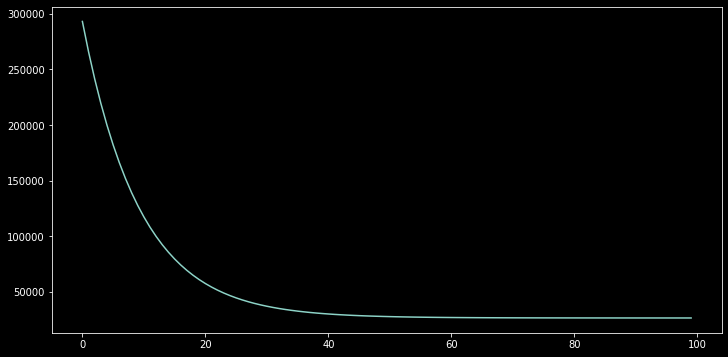

In [9]:
#cost function plot
plt.plot(Ypred[2])

### inbuilt

In [10]:
predict=LinRegression(x_train, y_train, x_test, y_test, inbuilt=1)
print("coefficients of Inbuilt LinearReg model: \n",predict[0],"\n")
print("predictions of Inbuilt LinearReg model: \n",predict[1][:20],"\n")
print("accuracy of this model is : ",predict[2])

coefficients of Inbuilt LinearReg model: 
 [-299.61019690007913, 1.6622347587478172] 

predictions of Inbuilt LinearReg model: 
 [ 934.68222321 1156.49082942  756.93946046  588.23925479  463.50515849
  468.35888399 1184.48286275 1319.65579333 1127.9835033  1244.02411181
 1300.07466788  837.90691555  525.27380213 1200.39044939  569.05706567
  708.46869489 1281.19168102 1224.04405001  459.73188559  547.56437024] 

accuracy of this model is :  0.7434206994180984


### line model

In [11]:
predict[1]

array([ 934.68222321, 1156.49082942,  756.93946046,  588.23925479,
        463.50515849,  468.35888399, 1184.48286275, 1319.65579333,
       1127.9835033 , 1244.02411181, 1300.07466788,  837.90691555,
        525.27380213, 1200.39044939,  569.05706567,  708.46869489,
       1281.19168102, 1224.04405001,  459.73188559,  547.56437024,
        920.03793498,  589.58566494, 1172.96357587,  724.72535083,
        496.25118324,  578.79776136,  965.91561432,  591.51385726,
        610.82902516,  541.03178764,  821.0518551 ,  804.79519916,
       1166.76344022,  830.84241783,  547.49788085,  579.03047423,
        837.49135686,  459.46592803,  564.4194307 ,  625.6894039 ,
        488.52179161, 1188.75480608, 1228.63181795,  537.82367456,
        480.3103519 ,  979.34647118,  501.021797  , 1078.66499801,
        524.25983893,  633.06972623,  589.41944147, 1305.69302136,
       1151.81994974, 1275.22425823, 1116.06528008, 1140.25079582,
        652.30178239, 1149.57593282, 1243.65842016,  976.67027

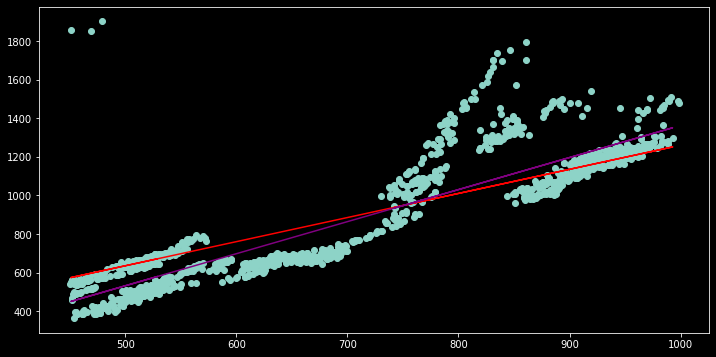

In [12]:
plt.scatter(X,Y)
plt.plot(x_test[x_test.columns[0]],Ypred[1], color='red') #scratch
plt.plot(x_test[x_test.columns[0]],predict[1], color='purple') #inbuilt
# plt.plot([min(X[X.columns[0]]), max(X[X.columns[0]])], [min(predict[1]), max(predict[1])], color='purple') #inbuilt

In [13]:
data=pd.read_csv('Computers.csv')
data=data.drop('index',axis=1).head(1000)
# data.isna().sum()
# data.info()
data.describe()

,price,speed,hd,ram,screen,ads,trend
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2382.26800,44.510000,255.083000,6.894000,14.420000,163.445000,4.822000
std,598.71311,15.165616,131.918105,4.014584,0.777306,65.396328,2.088703
min,1049.00000,25.000000,80.000000,2.000000,14.000000,94.000000,1.000000
25%,1975.00000,33.000000,170.000000,4.000000,14.000000,100.000000,3.000000
50%,2325.00000,33.000000,245.000000,8.000000,14.000000,139.000000,5.000000
75%,2699.00000,66.000000,340.000000,8.000000,15.000000,249.000000,7.000000
max,4494.00000,66.000000,1370.000000,16.000000,17.000000,298.000000,8.000000


In [14]:
print(data.describe().columns)
X=data[['speed', 'hd', 'ram', 'screen', 'ads', 'trend']]
Y=data['price']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.33,random_state=101)
Xtrain.reset_index(drop=True,inplace=True)
Xtest.reset_index(drop=True,inplace=True)
Ytrain.reset_index(drop=True,inplace=True)
Ytest.reset_index(drop=True,inplace=True)

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend'], dtype='object')


In [15]:
Ypred=LinRegression(Xtrain, Ytrain, Xtest, Ytest,0,[-220, 10, 0.9, 40, 120, 0.9, -45],alpha=0.000005) #[-220, 9, 0.7, 48, 123, 0.9, -45]
print("coefficients of Scratch LinearReg model: \n",Ypred[0],"\n")
print("predictions of Scratch LinearReg model: \n",Ypred[1][:20],"\n\n")

predict=LinRegression(Xtrain, Ytrain, Xtest, Ytest,1)
print("coefficients of Inbuilt LinearReg model: \n",predict[0],"\n")
print("predictions of Inbuilt LinearReg model: \n",predict[1][:20],"\n")
print("accuracy of this model is : ")

coefficients of Scratch LinearReg model: 
 [-220.02468296062722, 9.840839355827509, 2.2406236095409757, 39.842719772659166, 119.65752919087294, -1.0433311231810143, -45.07390576691986] 

predictions of Scratch LinearReg model: 
 [2731.1601963400367, 2027.2299327952749, 2455.6887476727757, 2285.1754198385947, 2247.944756596711, 1764.9484071295997, 3171.215123468307, 2976.1041000475916, 2046.6302127475187, 2530.2781552529505, 2895.79783663271, 1914.5831041920735, 1643.7113293704656, 2607.6953258384815, 2897.3773852009713, 2351.9776315375825, 2220.565993312107, 1948.503217948655, 2785.0266968654637, 2905.96172910279] 


coefficients of Inbuilt LinearReg model: 
 [-731.2225790819457, 13.454198505125403, 2.7956002516561584, 22.988143374248555, 133.62768077126333, 0.4260299395722379, -72.83218088587543] 

predictions of Inbuilt LinearReg model: 
 [2799.93946966 1905.44062859 2489.55515182 2314.21892369 2203.58594455
 1700.27488088 3038.00854077 2852.96329417 2143.4716971  2501.96731082
 2837

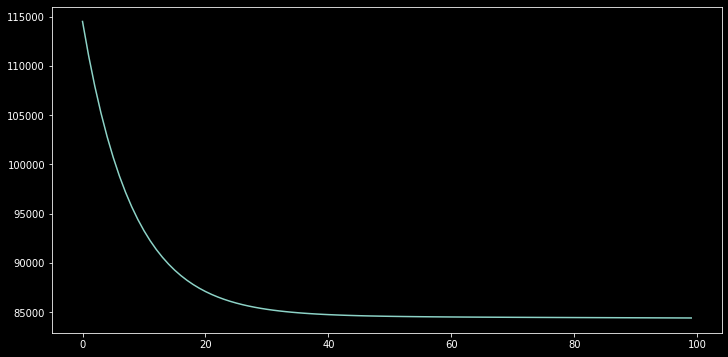

In [16]:
#cost function plot
plt.plot(Ypred[2])